In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# import cv2 as cv

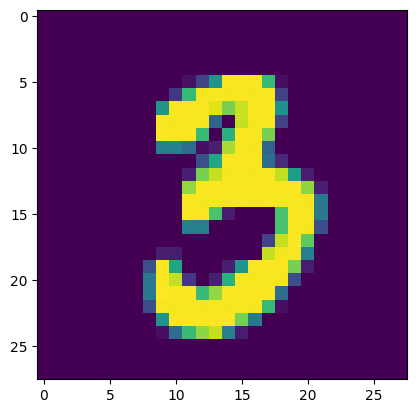

In [38]:
# Cargar datos de entrenamiento y prueba
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Forma de las imagenes 28 x 28 pixeles (60 000 imágenes)
x_train.shape

# Mostrar imagen de la posición
plt.imshow(x_train[890])

In [39]:
# Estandarizar los valores entre 0 y 1 pixeles (0,255)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [40]:
# Cambiar forma de los datos de entrada a 28x28 y a blanco/negro (1) color (3)
x_train = x_train.reshape(-1,28,28,1) # -1 establece automáticamente la dimensión
x_test = x_test.reshape(-1,28,28,1)

In [41]:
# Crear arquitectura de la red neuronal
modelo = keras.Sequential()
# Capa convolucion (#filtros,kernel,fun activacion, forma entrada)
capa_convolucion = Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))
# Capa agrupamiento 
capa_agrupamiento = MaxPooling2D(pool_size=(2,2))
# Capa aplanamiento
capa_aplanamiento = Flatten()
# Capas densas (escondidas)
capa_oculta = Dense(units=64,activation="relu")
# Capas salida
capa_salida = Dense(units=10,activation="softmax")

modelo = keras.Sequential([capa_convolucion, capa_agrupamiento, capa_aplanamiento, capa_oculta, capa_salida])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])
# Entrenar el modelo
y_train=keras.utils.to_categorical(y_train, num_classes=10)
y_test=keras.utils.to_categorical(y_test, num_classes=10)
modelo.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.2718 - accuracy: 0.9236
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0855 - accuracy: 0.9754
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0593 - accuracy: 0.9827
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0451 - accuracy: 0.9863
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0374 - accuracy: 0.9887
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 8/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 9/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0125 - accura

In [42]:
# Evaluar el modelo con los datos de prueba
perdida = modelo.evaluate(x_test,y_test)
print("La funcion de perdida es:", perdida[0])
print("La precision es:", perdida[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9840
La funcion de perdida es: 0.06993857771158218
La precision es: 0.984000027179718


1/1 [==============================] - 0s 15ms/step
La imagen se clasifica como: 8


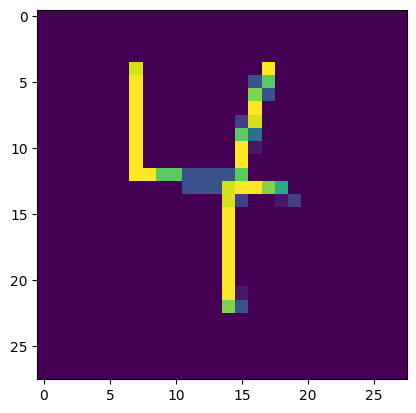

In [46]:
# Leer imagen
imagen = cv.imread("numero4v2.png")
plt.imshow(imagen)

#Aplicar filtro de desenfoque
imagen = cv.GaussianBlur(imagen,(3,3),0)

#Convertir a escala de grises
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# Redimensionar las imágenes a un tamaño de 28x28
imagen = cv.resize(imagen,(28,28),interpolation=cv.INTER_NEAREST)

# Aplicar la inversión de colores
imagen = cv.bitwise_not(imagen)
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color (escala de grises)
imagen = np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imágenes
imagen = np.expand_dims(imagen, axis=0)

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
print("La imagen se clasifica como:", predicted_class)